In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

import keras
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential

In [3]:
data = 'data'
cloudy = 'data/cloudy'
desert = 'data/desert'
forest = 'data/green_area'
water = 'data/water'

dirlist=[cloudy, desert, forest, water]
classes=['cloudy', 'desert', 'forest', 'water']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)

In [4]:
Files = pd.Series(filepaths, name='filepaths')
Label = pd.Series(labels, name='labels')
df = pd.concat([Files,Label], axis=1)

In [5]:
df.head()

,filepaths,labels
0,data/cloudy\train_10021.jpg,cloudy
1,data/cloudy\train_10043.jpg,cloudy
2,data/cloudy\train_10070.jpg,cloudy
3,data/cloudy\train_10081.jpg,cloudy
4,data/cloudy\train_10096.jpg,cloudy


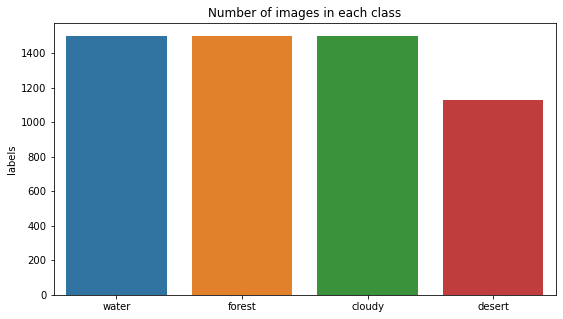

In [5]:
l = df['labels'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = l.index, y = l)
plt.title("Number of images in each class")
plt.show()

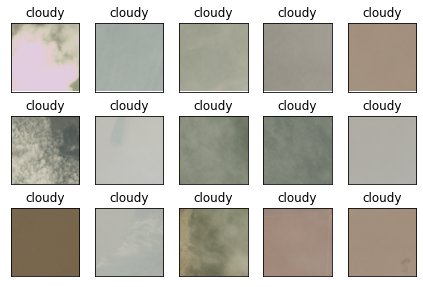

In [6]:
fig, axes = plt.subplots(nrows = 3,
                        ncols = 5,
                        figsize = (6, 4),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["filepaths"][i]))
    ax.set_title(df["labels"][i])
plt.tight_layout()
plt.show()

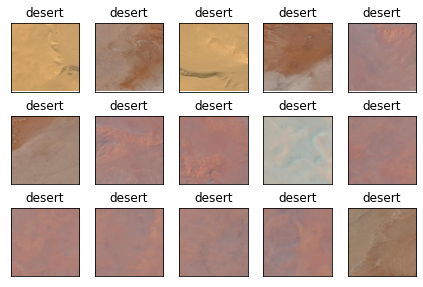

In [7]:
fig, axes = plt.subplots(nrows = 3,
                        ncols = 5,
                        figsize = (6, 4),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["filepaths"].values[1800:][i]))
    ax.set_title(df["labels"].values[1800:][i])
plt.tight_layout()
plt.show()

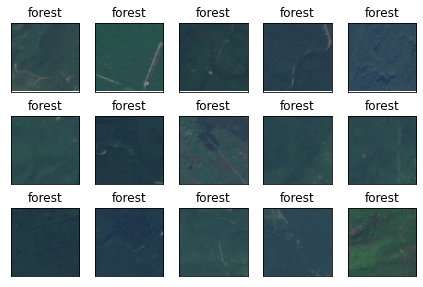

In [8]:
fig, axes = plt.subplots(nrows = 3,
                        ncols = 5,
                        figsize = (6, 4),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["filepaths"].values[2800:][i]))
    ax.set_title(df["labels"].values[2800:][i])
plt.tight_layout()
plt.show()

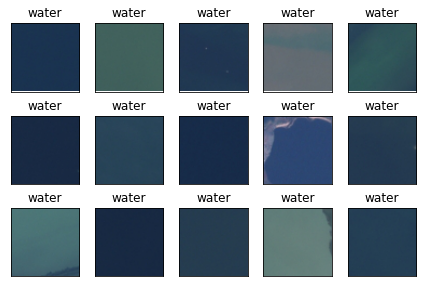

In [9]:
fig, axes = plt.subplots(nrows = 3,
                        ncols = 5,
                        figsize = (6, 4),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["filepaths"].values[5000:][i]))
    ax.set_title(df["labels"].values[5000:][i])
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size = 0.70, random_state = 42)

In [11]:
print('Training Dataset:')
print(f'Number of images: {train_df.shape[0]}')
print(f'Number of images with cloudy: {train_df["labels"].value_counts()[0]}')
print(f'Number of images with forest: {train_df["labels"].value_counts()[1]}')
print(f'Number of images with water: {train_df["labels"].value_counts()[2]}')
print(f'Number of images with dessert: {train_df["labels"].value_counts()[3]}\n')

print('Test Dataset:')
print(f'Number of images: {test_df.shape[0]}')
print(f'Number of images with cloudy: {test_df["labels"].value_counts()[0]}')
print(f'Number of images with forest: {test_df["labels"].value_counts()[1]}')
print(f'Number of images with water: {test_df["labels"].value_counts()[2]}')
print(f'Number of images with dessert: {test_df["labels"].value_counts()[3]}\n')

Training Dataset:
Number of images: 3941
Number of images with cloudy: 1077
Number of images with forest: 1062
Number of images with water: 1015
Number of images with dessert: 787

Test Dataset:
Number of images: 1690
Number of images with cloudy: 485
Number of images with forest: 438
Number of images with water: 423
Number of images with dessert: 344



In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

print("Preparing the training dataset ...")
training_set = train_datagen.flow_from_dataframe(dataframe = train_df, x_col = "filepaths",
                                                 y_col = "labels", target_size = (125, 125),
                                                 color_mode = "rgb", class_mode = "categorical",
                                                 batch_size = 32, shuffle = True, seed = 2,
                                                 subset = "training")

print("Preparing the test dataset ...")
test_set = test_datagen.flow_from_dataframe(dataframe = test_df, x_col = "filepaths",
                                            y_col = "labels", target_size = (125, 125),
                                            color_mode ="rgb", class_mode = "categorical",
                                            shuffle = False, batch_size = 32)

Preparing the training dataset ...
Found 3941 validated image filenames belonging to 4 classes.
Preparing the test dataset ...
Found 1690 validated image filenames belonging to 4 classes.


### Traditional CNN Architectures

In [13]:
epochs = 5
batch_size = 10
input_shape = (125, 125, 3)

In [15]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(84,activation = 'sigmoid')) 
model.add(Dense(60,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 123, 123, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)      

In [16]:
hist = model.fit(training_set, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=test_set)

Epoch 1/5
124/124 [==============================] - 96s 752ms/step - loss: 0.5462 - acc: 0.7612 - val_loss: 1.2826 - val_acc: 0.6568
Epoch 2/5
124/124 [==============================] - 94s 757ms/step - loss: 0.3912 - acc: 0.8457 - val_loss: 0.5993 - val_acc: 0.7391
Epoch 3/5
124/124 [==============================] - 92s 742ms/step - loss: 0.3882 - acc: 0.8452 - val_loss: 1.1615 - val_acc: 0.6391
Epoch 4/5
124/124 [==============================] - 93s 749ms/step - loss: 0.3544 - acc: 0.8526 - val_loss: 0.5133 - val_acc: 0.7722
Epoch 5/5
124/124 [==============================] - 98s 790ms/step - loss: 0.3616 - acc: 0.8538 - val_loss: 0.4559 - val_acc: 0.8006


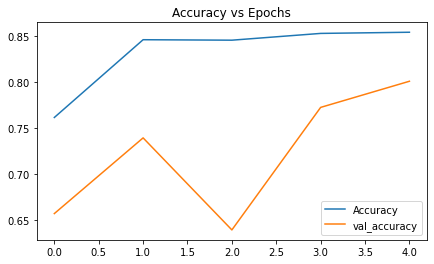

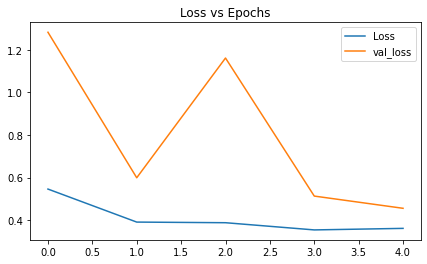

In [20]:
plt.figure(figsize = (7, 4))
plt.plot(hist.history['acc'],label="Accuracy")
plt.plot(hist.history["val_acc"],label = "val_accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

plt.figure(figsize = (7, 4))
plt.plot(hist.history['loss'],label="Loss")
plt.plot(hist.history["val_loss"],label = "val_loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

In [23]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(84,activation = 'sigmoid')) 
model.add(Dense(60,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 123, 123, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)      

In [24]:
hist = model.fit(training_set, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=test_set)

Epoch 1/5
124/124 [==============================] - 94s 746ms/step - loss: 0.6784 - acc: 0.7211 - val_loss: 0.6081 - val_acc: 0.6521
Epoch 2/5
124/124 [==============================] - 93s 746ms/step - loss: 0.4344 - acc: 0.8183 - val_loss: 0.5117 - val_acc: 0.7550
Epoch 3/5
124/124 [==============================] - 92s 744ms/step - loss: 0.3695 - acc: 0.8505 - val_loss: 0.5919 - val_acc: 0.7249
Epoch 4/5
124/124 [==============================] - 92s 741ms/step - loss: 0.3376 - acc: 0.8645 - val_loss: 0.4711 - val_acc: 0.8030
Epoch 5/5
124/124 [==============================] - 93s 749ms/step - loss: 0.3575 - acc: 0.8521 - val_loss: 0.6667 - val_acc: 0.7947


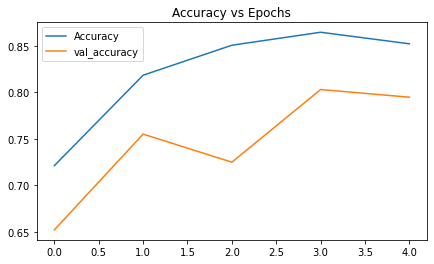

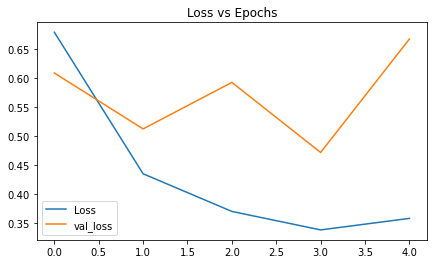

In [25]:
plt.figure(figsize = (7, 4))
plt.plot(hist.history['acc'],label="Accuracy")
plt.plot(hist.history["val_acc"],label = "val_accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

plt.figure(figsize = (7, 4))
plt.plot(hist.history['loss'],label="Loss")
plt.plot(hist.history["val_loss"],label = "val_loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

### Transfer Learning Architectures

In [27]:
from keras.applications.mobilenet_v2 import MobileNetV2

model = Sequential()
base_model = MobileNetV2(input_shape = [125, 125, 3], weights = 'imagenet', include_top = False)
base_model.trainable = True  

for i in base_model.layers[:100]: 
    base_model.trainable = False
    
pool = GlobalAveragePooling2D()
mid_layer = Dense(100,activation = 'relu')
final = Dense(4,activation = 'softmax')

model = Sequential([base_model, mid_layer, pool, final])
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dense_14 (Dense)            (None, 7, 7, 100)         128100    
                                                                 
 global_average_pooling2d_1   (None, 100)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_15 (Dense)            (None, 4)                 404       
                                                                 
Total params: 2,386,488
Trainable params: 128,504
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
hist = model.fit(training_set, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=test_set)

Epoch 1/5
124/124 [==============================] - 48s 338ms/step - loss: 0.2653 - accuracy: 0.9132 - val_loss: 0.1074 - val_accuracy: 0.9651
Epoch 2/5
124/124 [==============================] - 41s 329ms/step - loss: 0.0867 - accuracy: 0.9734 - val_loss: 0.1077 - val_accuracy: 0.9669
Epoch 3/5
124/124 [==============================] - 38s 309ms/step - loss: 0.0596 - accuracy: 0.9800 - val_loss: 0.0868 - val_accuracy: 0.9698
Epoch 4/5
124/124 [==============================] - 40s 322ms/step - loss: 0.0496 - accuracy: 0.9835 - val_loss: 0.0698 - val_accuracy: 0.9822
Epoch 5/5
124/124 [==============================] - 43s 349ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0624 - val_accuracy: 0.9793


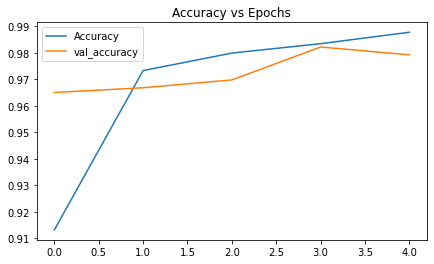

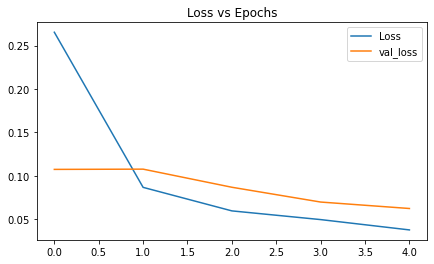

In [30]:
plt.figure(figsize = (7, 4))
plt.plot(hist.history['accuracy'],label="Accuracy")
plt.plot(hist.history["val_accuracy"],label = "val_accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

plt.figure(figsize = (7, 4))
plt.plot(hist.history['loss'],label="Loss")
plt.plot(hist.history["val_loss"],label = "val_loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

In [37]:
from tensorflow.keras.applications import vgg16

model = Sequential()
base_model = vgg16.VGG16(weights= 'imagenet', include_top = False, input_shape=(125, 125, 3))
base_model.trainable = True  

for i in base_model.layers[:100]: 
    base_model.trainable = False
    
pool = GlobalAveragePooling2D()
mid_layer = Dense(100,activation = 'relu')
final = Dense(4,activation = 'softmax')

model = Sequential([base_model, mid_layer, pool, final])
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 dense_16 (Dense)            (None, 3, 3, 100)         51300     
                                                                 
 global_average_pooling2d_2   (None, 100)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_17 (Dense)            (None, 4)                 404       
                                                                 
Total params: 14,766,392
Trainable params: 51,704
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
hist = model.fit(training_set, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=test_set)

Epoch 1/5
124/124 [==============================] - 389s 3s/step - loss: 1.1882 - accuracy: 0.5372 - val_loss: 0.9837 - val_accuracy: 0.6893
Epoch 2/5
124/124 [==============================] - 400s 3s/step - loss: 0.8076 - accuracy: 0.8346 - val_loss: 0.6807 - val_accuracy: 0.8550
Epoch 3/5
124/124 [==============================] - 403s 3s/step - loss: 0.5393 - accuracy: 0.8937 - val_loss: 0.4586 - val_accuracy: 0.8704
Epoch 4/5
124/124 [==============================] - 399s 3s/step - loss: 0.4020 - accuracy: 0.9061 - val_loss: 0.3625 - val_accuracy: 0.9059
Epoch 5/5
124/124 [==============================] - 405s 3s/step - loss: 0.3199 - accuracy: 0.9152 - val_loss: 0.3054 - val_accuracy: 0.9343


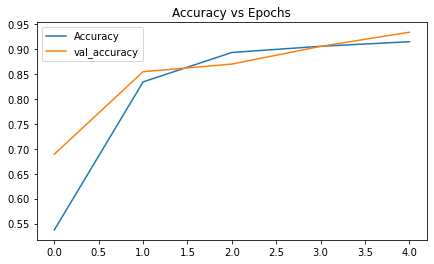

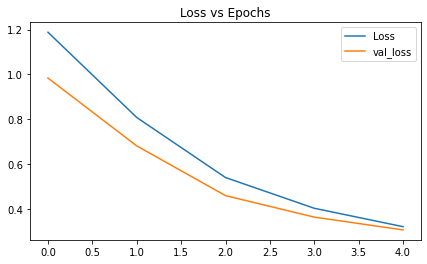

In [39]:
plt.figure(figsize = (7, 4))
plt.plot(hist.history['accuracy'],label="Accuracy")
plt.plot(hist.history["val_accuracy"],label = "val_accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

plt.figure(figsize = (7, 4))
plt.plot(hist.history['loss'],label="Loss")
plt.plot(hist.history["val_loss"],label = "val_loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

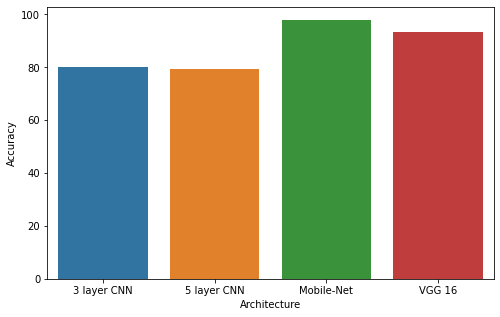

In [47]:
performance = pd.DataFrame({"Architecture":['3 layer CNN',
                                            '5 layer CNN',
                                            'Mobile-Net',
                                            'VGG 16'], 
                            "Accuracy":[80.06, 79.47, 97.93, 93.43]})

plt.figure(figsize = (8, 5))
sns.barplot(x= 'Architecture', y= 'Accuracy', data= performance)
plt.show()